In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
from IPython.display import SVG

# GA for NFAs

In [2]:
v1 = pd.read_csv('../GA_1/rf_ann_fixed/full_analysis_data_ensemble_rf_ann.csv', index_col=False)
v2 = pd.read_csv('../GA_2/full_analysis_data_GA2.csv', index_col=False)
v3 = pd.read_csv('../GA_3/full_analysis_data_GA3.csv', index_col=False)

In [3]:
terminal = []
fused_core = []
spacer = []

for x in range(len(v1['filename'])):
    filename = v1['filename'].iloc[x]
    units = filename.split('_')
    terminal.append(units[0])
    fused_core.append(units[1])
    if units[0] != units[2]:
        terminal.append(units[2])

for x in range(len(v2['filename'])):
    filename = v2['filename'].iloc[x]
    units = filename.split('_')
    terminal.append(units[0])
    spacer.append(units[1])
    fused_core.append(units[2])
    if units[3] != units[1]:
        spacer.append(units[3])
    if units[4] != units[0]:
        terminal.append(units[4]) 
        
for x in range(len(v3['filename'])):
    filename = v3['filename'].iloc[x]
    units = filename.split('_')
    terminal.append(units[0])
    spacer.append(units[1])
    if units[2] != units[1]:
        spacer.append(units[2])
    if ((units[3] != units[1]) and (units[3] != units[2])):
        spacer.append(units[3])
    if units[4] != units[0]:
        terminal.append(units[4])
        
           
df_terminal = pd.DataFrame(terminal, columns = ['terminal_name'])
terminal_count = df_terminal['terminal_name'].value_counts()[:10].to_frame()

df_fused_core = pd.DataFrame(fused_core, columns = ['fused_core_name'])
fused_core_count = df_fused_core['fused_core_name'].value_counts()[:10].to_frame()

df_spacer = pd.DataFrame(spacer, columns = ['spacer_name'])
spacer_count = df_spacer['spacer_name'].value_counts()[:10].to_frame()

fused_core_count

,fused_core_name
86,1868
126,533
100,427
113,231
130,221
135,211
83,202
118,188
115,167
104,135


In [4]:
terminal_count['term_perc'] = terminal_count['terminal_name']/terminal_count['terminal_name'].sum()*100
fused_core_count['fused_core_perc'] = fused_core_count['fused_core_name']/fused_core_count['fused_core_name'].sum()*100
spacer_count['spacer_perc'] = spacer_count['spacer_name']/spacer_count['spacer_name'].sum()*100

In [78]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14 
BIGGER_SIZE = 16 
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title 
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels 
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize 
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title"


C:\Users\bripe\AppData\Local\Temp/ipykernel_16968/486358085.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(terminal_count.index, rotation=45, fontsize=14)
C:\Users\bripe\AppData\Local\Temp/ipykernel_16968/486358085.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(fused_core_count.index, rotation=45, fontsize=14)
C:\Users\bripe\AppData\Local\Temp/ipykernel_16968/486358085.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(spacer_count.index, rotation=45, fontsize=14)


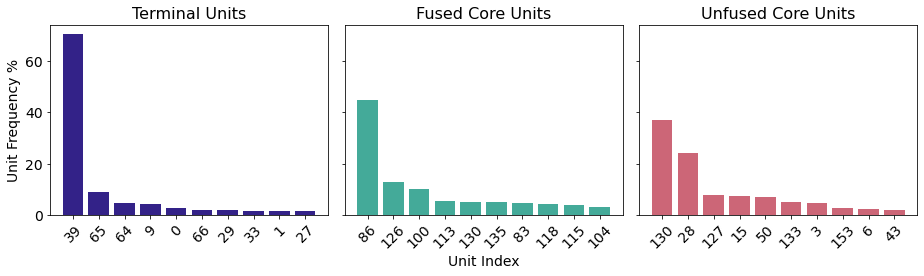

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4), sharey=True) 

ax1.bar(terminal_count.index, terminal_count['term_perc'], color='#332288')
ax1.set_title('Terminal Units', fontsize=16) 
ax1.set_ylabel("Unit Frequency %", fontsize=14)
ax1.set_xticklabels(terminal_count.index, rotation=45, fontsize=14) 
ax1.tick_params(axis='y', which='major', labelsize=14)

ax2.bar(fused_core_count.index, fused_core_count['fused_core_perc'], color='#44AA99')
ax2.set_title('Fused Core Units', fontsize=16) 
ax2.set_xticklabels(fused_core_count.index, rotation=45, fontsize=14) 
ax2.set_xlabel("Unit Index", fontsize=14)

ax3.bar(spacer_count.index, spacer_count['spacer_perc'], color='#CC6677')
ax3.set_title('Unfused Core Units', fontsize=16) 
ax3.set_xticklabels(spacer_count.index, rotation=45, fontsize=14) 

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

plt.savefig('frequency_units.pdf', dpi=600) 
plt.savefig('frequency_units.png', dpi=600)


# Visualize each top unit

### Terminal Units

In [5]:
terms = pd.read_csv('../../building_blocks/left_terminals_with_ringcount.csv', index_col=0)

term_smiles = []
term_index = []
for x in terminal_count.index:
    smiles = terms.iloc[int(x)][1]
    smiles = smiles + '*'
    term_smiles.append(smiles)
    term_index.append(x)
    
ms = [Chem.MolFromSmiles(x) for x in term_smiles]
img = Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(300,300), legends = term_index, useSVG=False, returnPNG=False)
img.save('term_units.png')
img.save('term_units.pdf')

### Fused Core Units

In [6]:
fused = pd.read_csv('../../building_blocks/fused_cores_with_ringcount.csv', index_col=0)
fused_smiles = []
fused_index = []
for x in fused_core_count.index:
    smiles = fused.iloc[int(x)][1]
    smiles = '*' + smiles + '*'
    fused_smiles.append(smiles)
    fused_index.append(x)
    
ms = [Chem.MolFromSmiles(x) for x in fused_smiles]
img = Draw.MolsToGridImage(ms,molsPerRow=3,subImgSize=(300,300), legends = fused_index, useSVG=False, returnPNG=False)
img.save('fused_units.png')
img.save('fused_units.pdf')

### Unfused core units

In [7]:
spacers = pd.read_csv('../../building_blocks/spacers_with_ringcount.csv', index_col=0)
spacers_smiles = []
spacers_index = []
for x in spacer_count.index:
    smiles = spacers.iloc[int(x)][1]
    smiles = '*' + smiles + '*'
    spacers_smiles.append(smiles)
    spacers_index.append(x)
    
ms = [Chem.MolFromSmiles(x) for x in spacers_smiles]
img = Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(300,300), legends = spacers_index, useSVG=False, returnPNG=False)
img.save('spacers_units.png')
img.save('spacers_units.pdf')

# GA for donors

In [9]:
v4 = pd.read_csv('../GA_4/full_analysis_data_GA4.csv', index_col=False)

unit = []
sequence = []

for x in range(len(v4['filename'])):
    filename = v4['filename'].iloc[x]
    units = filename.split('_')
    unit.append(units[0])
    if units[1] != units[0]:
        unit.append(units[1])
        
    sequence.append(units[2])
       
df_units = pd.DataFrame(unit, columns = ['unit'])
units_count = df_units['unit'].value_counts()[:10].to_frame()

df_seq = pd.DataFrame(sequence, columns = ['seq'])
seq_count = df_seq['seq'].value_counts()[:10].to_frame()

units_count['unit_perc'] = units_count['unit']/units_count['unit'].sum()*100
seq_count['seq_perc'] = seq_count['seq']/seq_count['seq'].sum()*100

C:\Users\bripe\AppData\Local\Temp/ipykernel_16968/3553702761.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(units_count.index, rotation=45, fontsize=14)
C:\Users\bripe\AppData\Local\Temp/ipykernel_16968/3553702761.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(seq_count.index, rotation=45, fontsize=14)


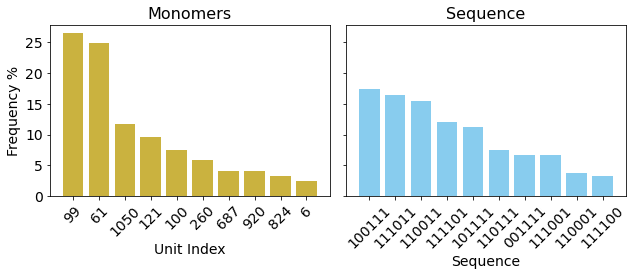

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True) 

ax1.bar(units_count.index, units_count['unit_perc'], color='#CAB23F')
ax1.set_title('Monomers', fontsize=16) 
ax1.set_ylabel("Frequency %", fontsize=14)
ax1.set_xticklabels(units_count.index, rotation=45, fontsize=14) 
ax1.tick_params(axis='y', which='major', labelsize=14)
ax1.set_xlabel("Unit Index", fontsize=14)

ax2.bar(seq_count.index, seq_count['seq_perc'], color='#88CCEE')
ax2.set_title('Sequence', fontsize=16) 
ax2.set_xticklabels(seq_count.index, rotation=45, fontsize=14) 
ax2.set_xlabel("Sequence", fontsize=14)


plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

plt.savefig('donor_frequency_units.pdf', dpi=600) 
plt.savefig('donor_frequency_units.png', dpi=600)

In [10]:
donor = pd.read_csv('../GA_4/GA4_donor_units.csv', index_col=0)
donor_smiles = []
donor_index = []
for x in units_count.index:
    smiles = donor.iloc[int(x)][0]
    smiles = '*' + smiles + '*'
    donor_smiles.append(smiles)
    donor_index.append(x)
    
ms = [Chem.MolFromSmiles(x) for x in donor_smiles]
img = Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(300,300), legends = donor_index, useSVG=False, returnPNG=False)
img.save('donor_units.png')
img.save('donor_units.pdf')